In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('global_power_plant.csv')

In [3]:
df

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747000,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,2019.0,NaN,NaN,0.994875,233.596650,865.400000,686.500000,NaN,Central Electricity Authority,NaN
903,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.shape


(907, 27)

In [5]:
df.columns

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'other_fuel1', 'other_fuel2',
       'other_fuel3', 'commissioning_year', 'owner', 'source', 'url',
       'geolocation_source', 'wepp_id', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018',
       'generation_gwh_2019', 'generation_data_source',
       'estimated_generation_gwh'],
      dtype='object')

In [6]:
df.dtypes

country                      object
country_long                 object
name                         object
gppd_idnr                    object
capacity_mw                 float64
latitude                    float64
longitude                   float64
primary_fuel                 object
other_fuel1                  object
other_fuel2                  object
other_fuel3                 float64
commissioning_year          float64
owner                        object
source                       object
url                          object
geolocation_source           object
wepp_id                     float64
year_of_capacity_data       float64
generation_gwh_2013         float64
generation_gwh_2014         float64
generation_gwh_2015         float64
generation_gwh_2016         float64
generation_gwh_2017         float64
generation_gwh_2018         float64
generation_gwh_2019         float64
generation_data_source       object
estimated_generation_gwh    float64
dtype: object

In [7]:
df.isnull().sum()   # we see lot of null values present in the data

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 906
other_fuel3                 907
commissioning_year          380
owner                       565
source                        0
url                           0
geolocation_source           19
wepp_id                     907
year_of_capacity_data       388
generation_gwh_2013         907
generation_gwh_2014         509
generation_gwh_2015         485
generation_gwh_2016         473
generation_gwh_2017         467
generation_gwh_2018         459
generation_gwh_2019         907
generation_data_source      458
estimated_generation_gwh    907
dtype: int64

In [8]:
#we find six columns with null value data without single entry and no data is present in these columns hence we would drop these columns

In [9]:
df=df.drop(['other_fuel2','other_fuel3','wepp_id','generation_gwh_2013','generation_gwh_2019','estimated_generation_gwh'],axis=1)

In [10]:
df

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,...,source,url,geolocation_source,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,2011.0,...,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,2004.0,...,Central Electricity Authority,http://www.cea.nic.in/,WRI,2019.0,617.789264,843.747000,886.004428,663.774500,626.239128,Central Electricity Authority
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,2015.0,...,Central Electricity Authority,http://www.cea.nic.in/,WRI,2019.0,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,Central Electricity Authority
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,2016.0,...,Central Electricity Authority,http://www.cea.nic.in/,WRI,2019.0,NaN,0.994875,233.596650,865.400000,686.500000,Central Electricity Authority
903,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,Karnataka Power Corporation Limited,http://karnatakapower.com,Industry About,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,CDM,https://cdm.unfccc.int/Projects/DB/TUEV-RHEIN1...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,Hindustan Zinc ltd,http://www.hzlindia.com/,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
df.shape   #six columns has been removed for the data as they dont contain any data in them

(907, 21)

In [12]:
df.isnull().sum()

country                     0
country_long                0
name                        0
gppd_idnr                   0
capacity_mw                 0
latitude                   46
longitude                  46
primary_fuel                0
other_fuel1               709
commissioning_year        380
owner                     565
source                      0
url                         0
geolocation_source         19
year_of_capacity_data     388
generation_gwh_2014       509
generation_gwh_2015       485
generation_gwh_2016       473
generation_gwh_2017       467
generation_gwh_2018       459
generation_data_source    458
dtype: int64

In [13]:
df['latitude']=df['latitude'].fillna(np.mean(df['latitude']))
df['longitude']=df['longitude'].fillna(np.mean(df['longitude']))
df['generation_gwh_2014']=df['generation_gwh_2014'].fillna(np.mean(df['generation_gwh_2014']))
df['generation_gwh_2015']=df['generation_gwh_2015'].fillna(np.mean(df['generation_gwh_2015']))
df['generation_gwh_2016']=df['generation_gwh_2016'].fillna(np.mean(df['generation_gwh_2016']))
df['generation_gwh_2017']=df['generation_gwh_2017'].fillna(np.mean(df['generation_gwh_2017']))
df['generation_gwh_2018']=df['generation_gwh_2018'].fillna(np.mean(df['generation_gwh_2018']))
df['commissioning_year']=df['commissioning_year'].fillna(np.mean(df['commissioning_year']))
df['year_of_capacity_data']=df['year_of_capacity_data'].fillna(np.mean(df['year_of_capacity_data']))

In [14]:
df.isnull().sum()

country                     0
country_long                0
name                        0
gppd_idnr                   0
capacity_mw                 0
latitude                    0
longitude                   0
primary_fuel                0
other_fuel1               709
commissioning_year          0
owner                     565
source                      0
url                         0
geolocation_source         19
year_of_capacity_data       0
generation_gwh_2014         0
generation_gwh_2015         0
generation_gwh_2016         0
generation_gwh_2017         0
generation_gwh_2018         0
generation_data_source    458
dtype: int64

In [15]:
from scipy import stats as st
of=df['other_fuel1']
own=df['owner']
gs=df['geolocation_source']
gds=df['generation_data_source']
print(st.mode(of))
print(st.mode(own))
print(st.mode(gs))
print(st.mode(gds))

ModeResult(mode=array(['Oil'], dtype=object), count=array([195]))
ModeResult(mode=array(['Jk Cement ltd'], dtype=object), count=array([4]))
ModeResult(mode=array(['WRI'], dtype=object), count=array([765]))
ModeResult(mode=array(['Central Electricity Authority'], dtype=object), count=array([449]))


In [16]:
df['other_fuel1']=df['other_fuel1'].fillna('Oil')
df['owner']=df['owner'].fillna('Sterling Agro Industries ltd.')
df['geolocation_source']=df['geolocation_source'].fillna('WRI')
df['generation_data_source']=df['generation_data_source'].fillna('Central Electricity Authority')

In [17]:
#replacing nan values in object data type with mode

In [18]:
df.isnull().sum()    #hence no missing values are present in the data

country                   0
country_long              0
name                      0
gppd_idnr                 0
capacity_mw               0
latitude                  0
longitude                 0
primary_fuel              0
other_fuel1               0
commissioning_year        0
owner                     0
source                    0
url                       0
geolocation_source        0
year_of_capacity_data     0
generation_gwh_2014       0
generation_gwh_2015       0
generation_gwh_2016       0
generation_gwh_2017       0
generation_gwh_2018       0
generation_data_source    0
dtype: int64

<AxesSubplot:>

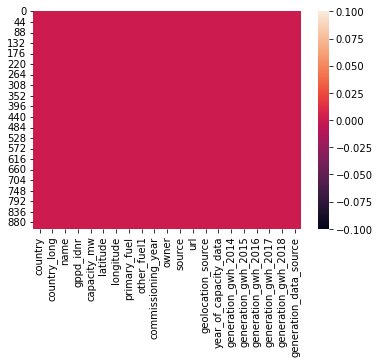

In [19]:
sns.heatmap(df.isnull())

In [20]:
df.corr()  # to find the correlation in the data

,capacity_mw,latitude,longitude,commissioning_year,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
capacity_mw,1.000000,0.050984,0.195882,0.274292,NaN,0.694350,0.711190,0.742221,0.757585,0.773456
latitude,0.050984,1.000000,0.036362,0.102069,NaN,0.044321,0.036398,0.031256,0.031212,0.031326
longitude,0.195882,0.036362,1.000000,0.092331,NaN,0.011472,0.018818,0.039209,0.039675,0.037780
commissioning_year,0.274292,0.102069,0.092331,1.000000,NaN,0.133051,0.147338,0.170644,0.170863,0.174377
year_of_capacity_data,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
generation_gwh_2014,0.694350,0.044321,0.011472,0.133051,NaN,1.000000,0.953594,0.925874,0.891687,0.884956
generation_gwh_2015,0.711190,0.036398,0.018818,0.147338,NaN,0.953594,1.000000,0.968888,0.928242,0.923461
generation_gwh_2016,0.742221,0.031256,0.039209,0.170644,NaN,0.925874,0.968888,1.000000,0.964649,0.957159
generation_gwh_2017,0.757585,0.031212,0.039675,0.170863,NaN,0.891687,0.928242,0.964649,1.000000,0.982689
generation_gwh_2018,0.773456,0.031326,0.037780,0.174377,NaN,0.884956,0.923461,0.957159,0.982689,1.000000


In [21]:
df.describe()

,capacity_mw,latitude,longitude,commissioning_year,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
count,907.000000,907.000000,907.000000,907.000000,907.0,907.000000,907.000000,907.000000,907.000000,907.000000
mean,326.223755,21.197918,77.464907,1997.091082,2019.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
std,590.085456,6.079148,4.812291,13.016360,0.0,2665.338608,2859.349132,2877.890004,2921.502193,3030.808041
min,0.000000,8.168900,68.644700,1927.000000,2019.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16.725000,17.072000,74.388900,1997.091082,2019.0,1211.362750,916.000000,896.500214,882.594850,824.842340
50%,59.200000,21.281800,76.979200,1997.091082,2019.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
75%,385.250000,25.176450,79.206100,2003.000000,2019.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
max,4760.000000,34.649000,95.408000,2018.000000,2019.0,28127.000000,30539.000000,30015.000000,35116.000000,35136.000000


In [22]:
df.dtypes

country                    object
country_long               object
name                       object
gppd_idnr                  object
capacity_mw               float64
latitude                  float64
longitude                 float64
primary_fuel               object
other_fuel1                object
commissioning_year        float64
owner                      object
source                     object
url                        object
geolocation_source         object
year_of_capacity_data     float64
generation_gwh_2014       float64
generation_gwh_2015       float64
generation_gwh_2016       float64
generation_gwh_2017       float64
generation_gwh_2018       float64
generation_data_source     object
dtype: object

Label encoding

In [23]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['country']=le.fit_transform(df['country'])
df['country_long']=le.fit_transform(df['country_long'])
df['name']=le.fit_transform(df['name'])
df['gppd_idnr']=le.fit_transform(df['gppd_idnr'])
df['primary_fuel']=le.fit_transform(df['primary_fuel'])
df['other_fuel1']=le.fit_transform(df['other_fuel1'])
df['owner']=le.fit_transform(df['owner'])
df['source']=le.fit_transform(df['source'])
df['url']=le.fit_transform(df['url'])
df['geolocation_source']=le.fit_transform(df['geolocation_source'])
df['generation_data_source']=le.fit_transform(df['generation_data_source'])

In [24]:
df.corr()['primary_fuel'].sort_values()

geolocation_source       -0.483217
capacity_mw              -0.380395
longitude                -0.347948
owner                    -0.212123
generation_gwh_2018      -0.136983
generation_gwh_2017      -0.132003
generation_gwh_2016      -0.131051
commissioning_year       -0.126650
generation_gwh_2015      -0.124828
generation_gwh_2014      -0.124769
latitude                 -0.010204
other_fuel1               0.004912
name                      0.040753
source                    0.053613
url                       0.589886
gppd_idnr                 0.609180
primary_fuel              1.000000
country                        NaN
country_long                   NaN
year_of_capacity_data          NaN
generation_data_source         NaN
Name: primary_fuel, dtype: float64

In [25]:
df.corr()['capacity_mw'].sort_values()

primary_fuel             -0.380395
gppd_idnr                -0.335742
url                      -0.243830
source                   -0.242122
other_fuel1               0.003105
latitude                  0.050984
name                      0.060240
longitude                 0.195882
geolocation_source        0.204865
owner                     0.252265
commissioning_year        0.274292
generation_gwh_2014       0.694350
generation_gwh_2015       0.711190
generation_gwh_2016       0.742221
generation_gwh_2017       0.757585
generation_gwh_2018       0.773456
capacity_mw               1.000000
country                        NaN
country_long                   NaN
year_of_capacity_data          NaN
generation_data_source         NaN
Name: capacity_mw, dtype: float64

In [26]:
# we see that in both the correlation columns with respect to the target variable the last four columns do not influence on the target variable hence we will eliminate those

In [27]:
df=df.drop(['country','country_long','year_of_capacity_data','generation_data_source'],axis=1)

In [28]:
df

,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,owner,source,url,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,0,657,2.5,28.1839,73.2407,6,2,2011.000000,229,109,128,1,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
1,1,519,98.0,24.7663,74.6090,1,2,1997.091082,258,174,173,2,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
2,2,853,39.2,21.9038,69.3732,7,2,1997.091082,2,21,205,2,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
3,3,0,135.0,23.8712,91.3602,2,2,2004.000000,234,22,58,2,617.789264,843.747000,886.004428,663.774500,626.239128
4,4,1,1800.0,21.9603,82.4091,1,2,2015.000000,234,22,58,2,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,902,491,1600.0,16.2949,77.3568,1,2,2016.000000,234,22,58,2,2431.823590,0.994875,233.596650,865.400000,686.500000
903,903,822,3.0,12.8932,78.1654,6,2,1997.091082,114,77,22,0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
904,904,891,25.5,15.2758,75.5811,7,2,1997.091082,234,21,260,2,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
905,905,539,80.0,24.3500,73.7477,1,2,1997.091082,91,59,82,2,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099


In [29]:
df=df.set_index('name')   # we are setting name as index column as it produces same as index
df

,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,owner,source,url,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
name,,,,,,,,,,,,,,,,
0,657,2.5,28.1839,73.2407,6,2,2011.000000,229,109,128,1,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
1,519,98.0,24.7663,74.6090,1,2,1997.091082,258,174,173,2,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
2,853,39.2,21.9038,69.3732,7,2,1997.091082,2,21,205,2,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
3,0,135.0,23.8712,91.3602,2,2,2004.000000,234,22,58,2,617.789264,843.747000,886.004428,663.774500,626.239128
4,1,1800.0,21.9603,82.4091,1,2,2015.000000,234,22,58,2,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,491,1600.0,16.2949,77.3568,1,2,2016.000000,234,22,58,2,2431.823590,0.994875,233.596650,865.400000,686.500000
903,822,3.0,12.8932,78.1654,6,2,1997.091082,114,77,22,0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
904,891,25.5,15.2758,75.5811,7,2,1997.091082,234,21,260,2,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099


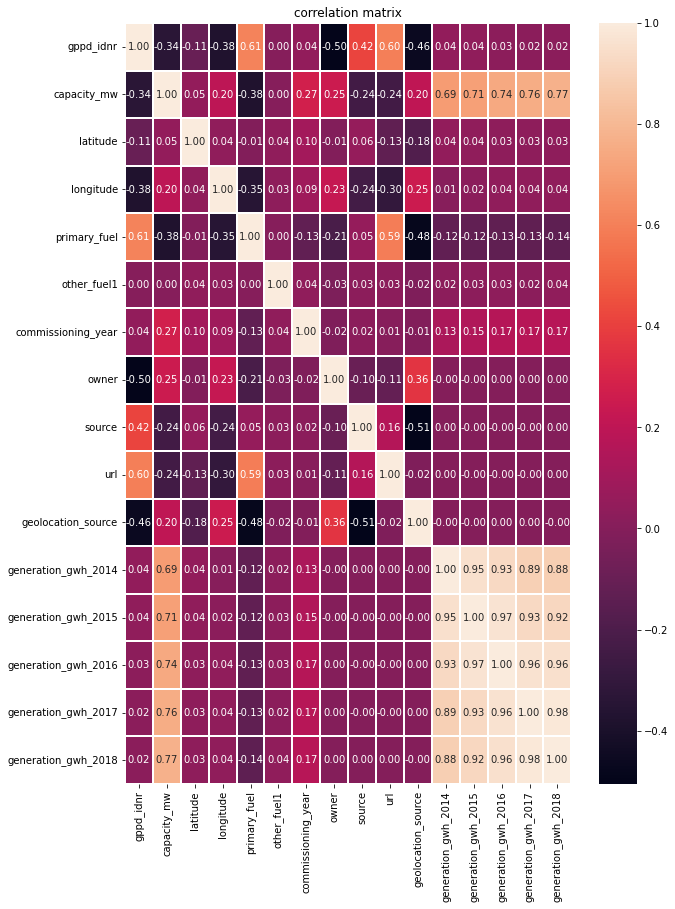

In [30]:
plt.figure(figsize=(10,14))
sns.heatmap(df.corr(),annot=True,fmt='.2f',linewidth=2)    # we see correlation in last columns
plt.title('correlation matrix')
plt.show()

We will perform Bivariant analysis for both the target variables

<AxesSubplot:xlabel='generation_gwh_2014', ylabel='primary_fuel'>

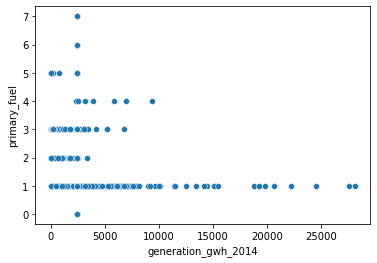

In [31]:
sns.scatterplot(x='generation_gwh_2014',y='primary_fuel',data=df)   #for primary fuel prediction

<AxesSubplot:xlabel='gppd_idnr', ylabel='primary_fuel'>

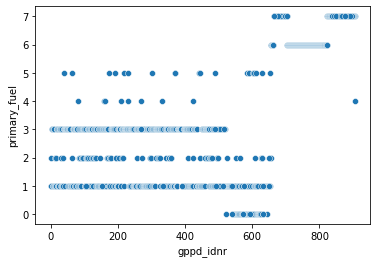

In [32]:
sns.scatterplot(x='gppd_idnr',y='primary_fuel',data=df)

<AxesSubplot:xlabel='source', ylabel='primary_fuel'>

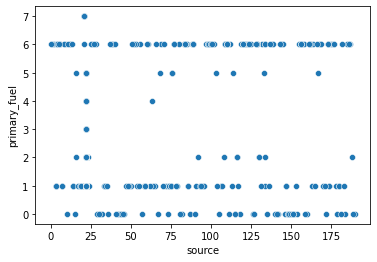

In [33]:
sns.scatterplot(x='source',y='primary_fuel',data=df)

<AxesSubplot:xlabel='capacity_mw', ylabel='primary_fuel'>

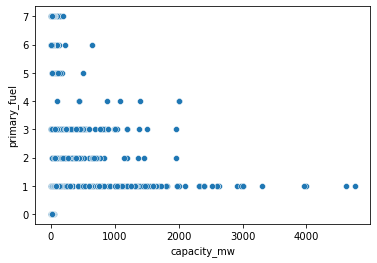

In [34]:
sns.scatterplot(x='capacity_mw',y='primary_fuel',data=df)

<AxesSubplot:xlabel='primary_fuel', ylabel='capacity_mw'>

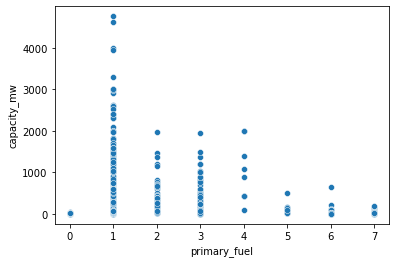

In [35]:
sns.scatterplot(x='primary_fuel',y='capacity_mw',data=df)  #for capacity_mw predictions

<AxesSubplot:xlabel='generation_gwh_2018', ylabel='capacity_mw'>

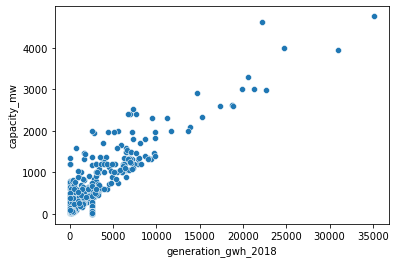

In [36]:
sns.scatterplot(x='generation_gwh_2018',y='capacity_mw',data=df)

<AxesSubplot:xlabel='generation_gwh_2017', ylabel='capacity_mw'>

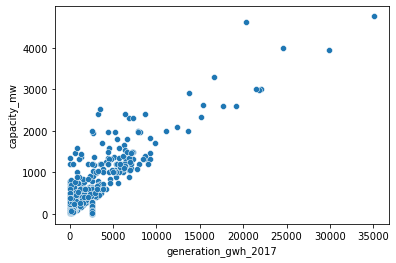

In [37]:
sns.scatterplot(x='generation_gwh_2017',y='capacity_mw',data=df)

<AxesSubplot:xlabel='geolocation_source', ylabel='capacity_mw'>

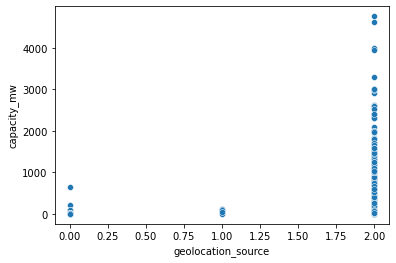

In [38]:
sns.scatterplot(x='geolocation_source',y='capacity_mw',data=df)

To Check skewness in the data

In [39]:
df.skew()  

gppd_idnr               0.000000
capacity_mw             3.123576
latitude               -0.149698
longitude               1.141881
primary_fuel            0.472251
other_fuel1           -20.453120
commissioning_year     -1.399359
owner                  -1.604781
source                  1.827373
url                     1.510537
geolocation_source     -2.159841
generation_gwh_2014     5.035446
generation_gwh_2015     5.364134
generation_gwh_2016     5.068427
generation_gwh_2017     5.110952
generation_gwh_2018     4.937907
dtype: float64

array([[<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>]],
      dtype=object)

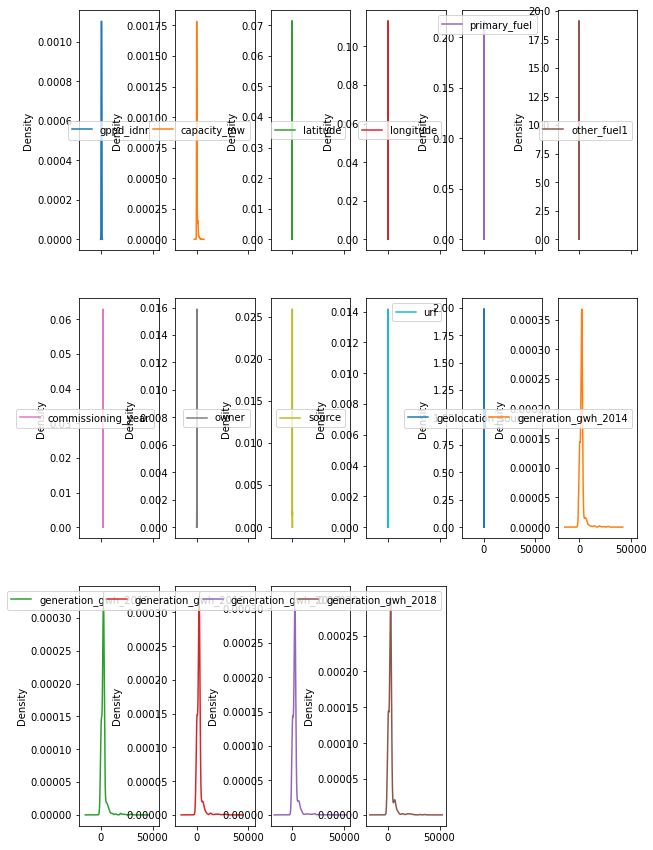

In [40]:
df.plot(kind='kde',subplots=True,layout=(3,6),figsize=(10,15))  #we see skewness present in some columns

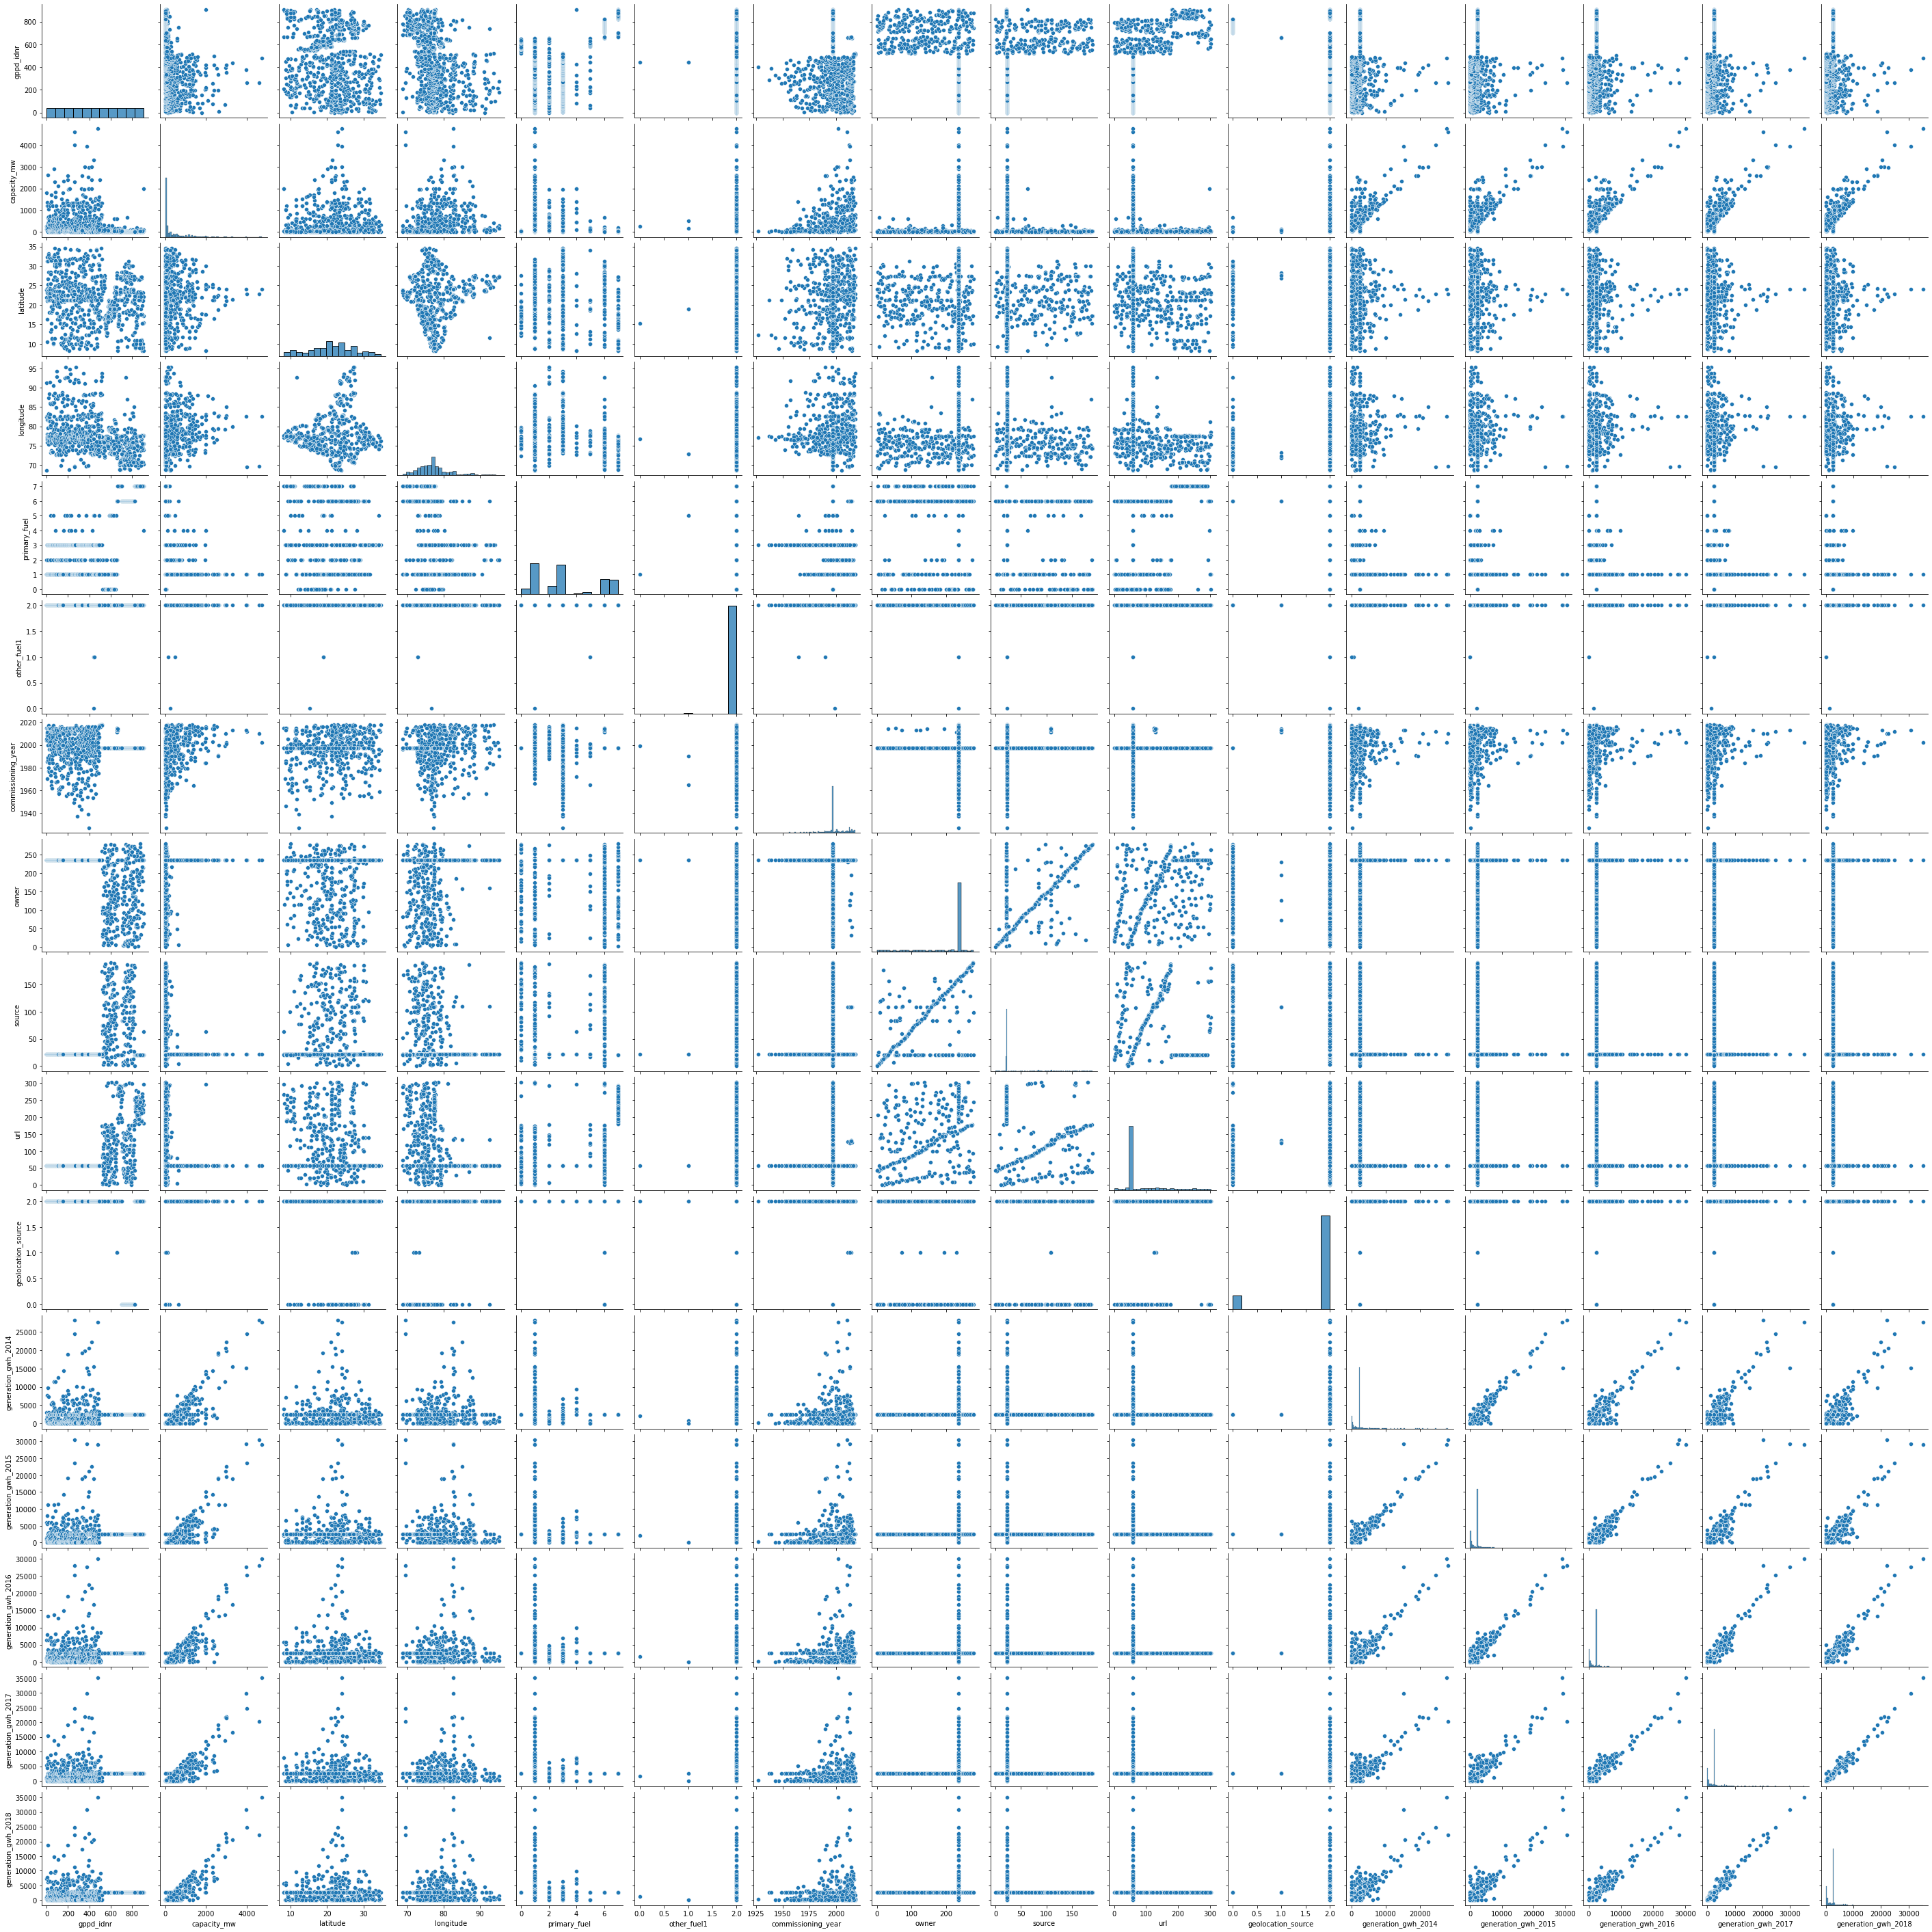

In [89]:
sns.pairplot(df)
plt.show()

To Check Outliers present in the data

gppd_idnr                 AxesSubplot(0.125,0.657941;0.110714x0.222059)
capacity_mw            AxesSubplot(0.257857,0.657941;0.110714x0.222059)
latitude               AxesSubplot(0.390714,0.657941;0.110714x0.222059)
longitude              AxesSubplot(0.523571,0.657941;0.110714x0.222059)
primary_fuel           AxesSubplot(0.656429,0.657941;0.110714x0.222059)
other_fuel1            AxesSubplot(0.789286,0.657941;0.110714x0.222059)
commissioning_year        AxesSubplot(0.125,0.391471;0.110714x0.222059)
owner                  AxesSubplot(0.257857,0.391471;0.110714x0.222059)
source                 AxesSubplot(0.390714,0.391471;0.110714x0.222059)
url                    AxesSubplot(0.523571,0.391471;0.110714x0.222059)
geolocation_source     AxesSubplot(0.656429,0.391471;0.110714x0.222059)
generation_gwh_2014    AxesSubplot(0.789286,0.391471;0.110714x0.222059)
generation_gwh_2015          AxesSubplot(0.125,0.125;0.110714x0.222059)
generation_gwh_2016       AxesSubplot(0.257857,0.125;0.110714x0.

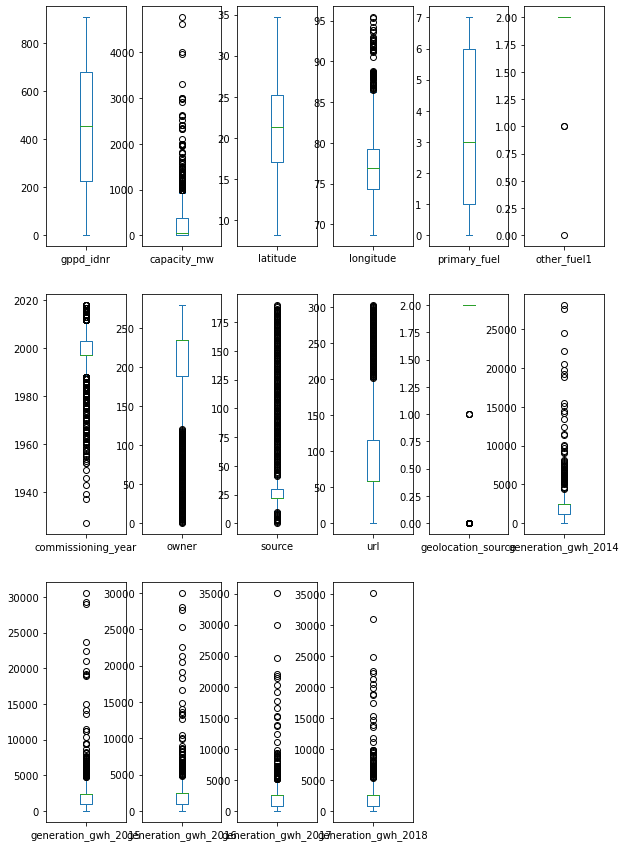

In [41]:
df.plot(kind='box',subplots=True,layout=(3,6),figsize=(10,15))

In [42]:
# we see outliers present in most of the columns

Removing Outliers

In [43]:
from scipy.stats import zscore
z=np.abs(zscore(df))
z.shape

(907, 16)

In [44]:
threshold=3
print(np.where(z>3))

(array([ 15,  15,  15,  15,  15,  71,  80, 143, 143, 143, 143, 143, 143,
       147, 158, 179, 183, 191, 209, 209, 209, 209, 209, 209, 222, 244,
       299, 308, 308, 308, 308, 308, 308, 321, 323, 333, 340, 342, 345,
       360, 363, 364, 364, 364, 364, 364, 364, 371, 375, 416, 427, 444,
       454, 478, 482, 484, 493, 493, 493, 493, 493, 493, 494, 494, 494,
       494, 494, 494, 499, 519, 538, 541, 546, 573, 577, 583, 592, 601,
       621, 638, 648, 648, 648, 648, 648, 648, 657, 657, 657, 657, 657,
       657, 661, 669, 689, 695, 695, 695, 695, 695, 695, 706, 709, 721,
       721, 721, 721, 724, 724, 724, 724, 724, 726, 726, 726, 726, 726,
       726, 728, 767, 786, 786, 786, 786, 786, 786, 788, 807, 808, 808,
       808, 808, 808, 808, 811, 813, 817, 818, 832, 847, 848, 870, 871,
       879, 880, 880, 880, 880, 880, 880, 895, 900], dtype=int64), array([ 1, 12, 13, 14, 15,  8,  8,  1, 11, 12, 13, 14, 15,  1, 11,  3,  3,
        8,  1, 11, 12, 13, 14, 15,  6,  3,  8,  1, 11, 12, 13, 14

In [45]:
len(np.where(z>3)[0])

152

In [46]:
df_new=df[(z<3).all(axis=1)]
print('old shape',df.shape)
print('new_shape',df_new.shape)

old shape (907, 16)
new_shape (831, 16)


In [47]:
loss_data=(907-831)/907*100   
print('%of loss=',loss_data)

%of loss= 8.379272326350605


Splitting of data

In [48]:
x1=df_new.drop(['primary_fuel'],axis=1)   # for primary fuel prediction
y1=df_new['primary_fuel']  # we have removed two other columns from x1 as they are in high correlation

x2=df_new.drop(['capacity_mw'],axis=1)    #for capacity prediction
y2=df_new['capacity_mw']

In [49]:
x1

,gppd_idnr,capacity_mw,latitude,longitude,other_fuel1,commissioning_year,owner,source,url,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
name,,,,,,,,,,,,,,,
0,657,2.5,28.1839,73.2407,2,2011.000000,229,109,128,1,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
1,519,98.0,24.7663,74.6090,2,1997.091082,258,174,173,2,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
2,853,39.2,21.9038,69.3732,2,1997.091082,2,21,205,2,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
3,0,135.0,23.8712,91.3602,2,2004.000000,234,22,58,2,617.789264,843.747000,886.004428,663.774500,626.239128
4,1,1800.0,21.9603,82.4091,2,2015.000000,234,22,58,2,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,491,1600.0,16.2949,77.3568,2,2016.000000,234,22,58,2,2431.823590,0.994875,233.596650,865.400000,686.500000
903,822,3.0,12.8932,78.1654,2,1997.091082,114,77,22,0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
904,891,25.5,15.2758,75.5811,2,1997.091082,234,21,260,2,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099


In [50]:
y1.shape



(831,)

In [51]:
x1.shape

(831, 15)

To predict Primary Fuel 

In [52]:
#Based on the output variable we will perform Classification for this model.


In [53]:
from sklearn.preprocessing import power_transform   #To remove skewness in the data
x1=power_transform(x1,method='yeo-johnson')

In [54]:
x1

array([[ 0.75488224, -1.67048521,  1.15757565, ...,  0.36060402,
         0.36386759,  0.376212  ],
       [ 0.29899613,  0.21388086,  0.59065259, ...,  0.36060402,
         0.36386759,  0.376212  ],
       [ 1.35958446, -0.28126741,  0.11978205, ...,  0.36060402,
         0.36386759,  0.376212  ],
       ...,
       [ 1.47217222, -0.51340494, -0.95395687, ...,  0.36060402,
         0.36386759,  0.376212  ],
       [ 0.36695645,  0.10444265,  0.52193742, ...,  0.36060402,
         0.36386759,  0.376212  ],
       [ 1.42789016, -0.74658084, -1.7976091 , ...,  0.36060402,
         0.36386759,  0.376212  ]])

In [55]:
from sklearn.preprocessing import StandardScaler   # to scale the data after removing skewness
sc=StandardScaler()
x1=sc.fit_transform(x1)
x1

array([[ 0.75488224, -1.67048521,  1.15757565, ...,  0.36060402,
         0.36386759,  0.376212  ],
       [ 0.29899613,  0.21388086,  0.59065259, ...,  0.36060402,
         0.36386759,  0.376212  ],
       [ 1.35958446, -0.28126741,  0.11978205, ...,  0.36060402,
         0.36386759,  0.376212  ],
       ...,
       [ 1.47217222, -0.51340494, -0.95395687, ...,  0.36060402,
         0.36386759,  0.376212  ],
       [ 0.36695645,  0.10444265,  0.52193742, ...,  0.36060402,
         0.36386759,  0.376212  ],
       [ 1.42789016, -0.74658084, -1.7976091 , ...,  0.36060402,
         0.36386759,  0.376212  ]])

In [56]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
from sklearn.metrics import accuracy_score

In [57]:
import sklearn
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import  KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
x1_train,x1_test,y1_train,y1_test=train_test_split(x1,y1,test_size=0.20)
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import warnings
warnings.filterwarnings('ignore')

knn=KNeighborsClassifier()
lg=LogisticRegression()
gnb=GaussianNB()
svc=SVC()
dtc=DecisionTreeClassifier()


model=[knn,lg,gnb,svc,dtc]

for m in model:
    m.fit(x1_train,y1_train)
    m.score(x1_test,y1_test)
    predm=m.predict(x1_test)
    print ('accuracy score of',m,'is:')
    print(accuracy_score(y1_test,predm))
    print(confusion_matrix(y1_test,predm))
    print(classification_report(y1_test,predm))
    print('\n')

accuracy score of KNeighborsClassifier() is:
0.7664670658682635
[[10  3  0  0  0  0  0  0]
 [ 5 36  1  3  0  0  0  0]
 [ 0  4  3  3  0  2  0  0]
 [ 0  7  3 31  0  0  0  0]
 [ 0  3  0  0  0  0  0  0]
 [ 1  0  1  1  0  0  0  0]
 [ 0  2  0  0  0  0 28  0]
 [ 0  0  0  0  0  0  0 20]]
              precision    recall  f1-score   support

           0       0.62      0.77      0.69        13
           1       0.65      0.80      0.72        45
           2       0.38      0.25      0.30        12
           3       0.82      0.76      0.78        41
           4       0.00      0.00      0.00         3
           5       0.00      0.00      0.00         3
           6       1.00      0.93      0.97        30
           7       1.00      1.00      1.00        20

    accuracy                           0.77       167
   macro avg       0.56      0.56      0.56       167
weighted avg       0.75      0.77      0.76       167



accuracy score of LogisticRegression() is:
0.7485029940119761
[[ 9

In [58]:
#we find that svc is providing accuracy  of 78% 

In [58]:
#cross validation for svc classifier
from sklearn.model_selection import cross_val_score
pred_test=svc.predict(x1_test)
lss=accuracy_score(y1_test,pred_test)
for j in range(2,10):
    lsscore= cross_val_score(knn,x1,y1,cv=j)
    lsc= lsscore.mean()
    print('at cv=',j)
    print('cross validation score is',lsc *100)
    print('accuracy_score is',lss*100)
    print('\n')

at cv= 2
cross validation score is 78.4600903614458
accuracy_score is 78.44311377245509


at cv= 3
cross validation score is 80.14440433212997
accuracy_score is 78.44311377245509


at cv= 4
cross validation score is 78.82234764028242
accuracy_score is 78.44311377245509


at cv= 5
cross validation score is 79.78861554000433
accuracy_score is 78.44311377245509


at cv= 6
cross validation score is 79.66409481110765
accuracy_score is 78.44311377245509


at cv= 7
cross validation score is 80.74450119030664
accuracy_score is 78.44311377245509


at cv= 8
cross validation score is 80.62570014936519
accuracy_score is 78.44311377245509


at cv= 9
cross validation score is 80.62178588125293
accuracy_score is 78.44311377245509




In [60]:
# we find the cross validation score and accuracy score at cv=5 is almost same

Grid Search CV

In [59]:
#Hyper prameter tuning

from sklearn.model_selection import GridSearchCV
from sklearn import svm

parameters={'kernel':['linear','rbf'],'C':[1,10]}
svc=svm.SVC()
clf=GridSearchCV(svc,parameters)
clf.fit(x1_train,y1_train)

print(clf.best_params_)

{'C': 10, 'kernel': 'rbf'}


In [61]:
print(clf.best_estimator_)

SVC(C=10)


In [63]:
clf_predictions = clf.predict(x1_test)
 
# print classification report
print(classification_report(y1_test, clf_predictions))

              precision    recall  f1-score   support

           0       0.83      0.77      0.80        13
           1       0.72      0.87      0.79        45
           2       0.57      0.33      0.42        12
           3       0.84      0.88      0.86        41
           4       0.00      0.00      0.00         3
           5       0.00      0.00      0.00         3
           6       1.00      0.97      0.98        30
           7       1.00      1.00      1.00        20

    accuracy                           0.83       167
   macro avg       0.62      0.60      0.61       167
weighted avg       0.81      0.83      0.81       167



In [64]:
#with hyper paramter tuning the accuracy is increased to 83%

In [68]:
#This model is working at 83% accuracy 

To predict capacity_mw

In [69]:
from sklearn.preprocessing import power_transform
x2=power_transform(x2,method='yeo-johnson')

In [70]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x2=sc.fit_transform(x2)
x2

array([[ 0.75488224,  1.15757565, -0.93159857, ...,  0.36060402,
         0.36386759,  0.376212  ],
       [ 0.29899613,  0.59065259, -0.5157841 , ...,  0.36060402,
         0.36386759,  0.376212  ],
       [ 1.35958446,  0.11978205, -2.35129266, ...,  0.36060402,
         0.36386759,  0.376212  ],
       ...,
       [ 1.47217222, -0.95395687, -0.24337353, ...,  0.36060402,
         0.36386759,  0.376212  ],
       [ 0.36695645,  0.52193742, -0.77288461, ...,  0.36060402,
         0.36386759,  0.376212  ],
       [ 1.42789016, -1.7976091 ,  0.238852  , ...,  0.36060402,
         0.36386759,  0.376212  ]])

In [71]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
from sklearn.metrics import r2_score

In [72]:
for i in range (0,100):
    x2_train,x2_test,y2_train,y2_test=train_test_split(x2,y2,random_state=i,test_size=.20)
    lr.fit(x2_train,y2_train)
    pred_train=lr.predict(x2_train)
    pred_test=lr.predict(x2_test)
    print(f'for random state {i},the training accuracy is',{r2_score(y2_train,pred_train)})
    print(f'for random state {i} ,the testing accuracy is',{r2_score(y2_test, pred_test)})
    print('\n')

for random state 0,the training accuracy is {0.6024064551151471}
for random state 0 ,the testing accuracy is {0.3558743471423692}


for random state 1,the training accuracy is {0.5321787217976999}
for random state 1 ,the testing accuracy is {0.6214447282853406}


for random state 2,the training accuracy is {0.572036997271212}
for random state 2 ,the testing accuracy is {0.456778404307288}


for random state 3,the training accuracy is {0.5411875851937538}
for random state 3 ,the testing accuracy is {0.6087641912819022}


for random state 4,the training accuracy is {0.5543789009608833}
for random state 4 ,the testing accuracy is {0.5456220710441435}


for random state 5,the training accuracy is {0.5364853015056372}
for random state 5 ,the testing accuracy is {0.5891930461114621}


for random state 6,the training accuracy is {0.5357656358250078}
for random state 6 ,the testing accuracy is {0.62920119251345}


for random state 7,the training accuracy is {0.5859233196146033}
for random stat

for random state 67 ,the testing accuracy is {0.6182753438636648}


for random state 68,the training accuracy is {0.5798792869882328}
for random state 68 ,the testing accuracy is {0.4408084171541937}


for random state 69,the training accuracy is {0.5752749737951584}
for random state 69 ,the testing accuracy is {0.46596913199124723}


for random state 70,the training accuracy is {0.5411399396518805}
for random state 70 ,the testing accuracy is {0.5965323260942781}


for random state 71,the training accuracy is {0.5559211426208892}
for random state 71 ,the testing accuracy is {0.5212054542835114}


for random state 72,the training accuracy is {0.5470255574652771}
for random state 72 ,the testing accuracy is {0.5673940041214662}


for random state 73,the training accuracy is {0.5582163675916987}
for random state 73 ,the testing accuracy is {0.5284486461336528}


for random state 74,the training accuracy is {0.5743336021736427}
for random state 74 ,the testing accuracy is {0.4746249065639

In [73]:
x2_train,x2_test,y2_train,y2_test=train_test_split(x2,y2,random_state=79,test_size=.20)

In [74]:
lr.fit(x2_train,y2_train)

LinearRegression()

In [75]:
pred_test=lr.predict(x2_test)

In [76]:
print(r2_score(y2_test,pred_test))

0.5400652926837445


Cross Validation

In [77]:
Train_accuracy=r2_score(y2_train,pred_train)
testing_accuracy=r2_score(y2_test,pred_test)

from sklearn.model_selection import cross_val_score
for j in range(2,10):
    cv_score=cross_val_score(lr,x2,y2,cv=j)
    cv_mean=cv_score.mean()
    print(f'at cross fold {j} the cv score is {cv_mean} and the train accuracy score is {Train_accuracy} and test accuracy score is {testing_accuracy}')
    print('\n')

at cross fold 2 the cv score is 0.3660031893852324 and the train accuracy score is -0.4984489543818087 and test accuracy score is 0.5400652926837445


at cross fold 3 the cv score is 0.44622011140596496 and the train accuracy score is -0.4984489543818087 and test accuracy score is 0.5400652926837445


at cross fold 4 the cv score is 0.4647735945070848 and the train accuracy score is -0.4984489543818087 and test accuracy score is 0.5400652926837445


at cross fold 5 the cv score is 0.4942216357821526 and the train accuracy score is -0.4984489543818087 and test accuracy score is 0.5400652926837445


at cross fold 6 the cv score is 0.4934924928715452 and the train accuracy score is -0.4984489543818087 and test accuracy score is 0.5400652926837445


at cross fold 7 the cv score is 0.47706365355613733 and the train accuracy score is -0.4984489543818087 and test accuracy score is 0.5400652926837445


at cross fold 8 the cv score is 0.4946881316287588 and the train accuracy score is -0.498448

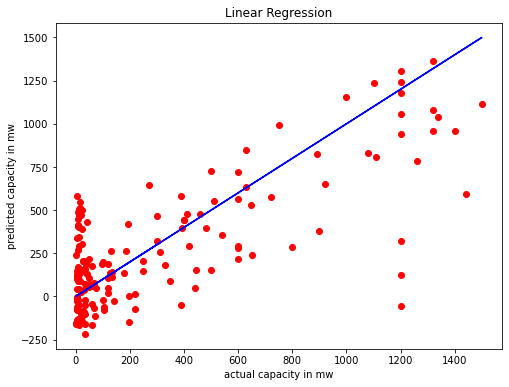

In [78]:
plt.figure(figsize=[8,6])
plt.scatter(x=y2_test,y=pred_test,color='red')
plt.plot(y2_test,y2_test,color='b')
plt.xlabel('actual capacity in mw')
plt.ylabel('predicted capacity in mw')
plt.title('Linear Regression')
plt.show()

Grid Search C V

In [79]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
parameters= {'alpha':[.0001,.001,.01,.1,1,10],'random_state':list(range(0,10))}
ls=Lasso()
clf=GridSearchCV(ls,parameters)
clf.fit(x2_train,y2_train)
print(clf.best_params_)

{'alpha': 1, 'random_state': 0}


In [80]:
# Model Training

ls=Lasso(alpha=1,random_state=0)
ls.fit(x2_train,y2_train)
ls_score_training=ls.score(x2_train,y2_train)
pred_ls=ls.predict(x2_test)
ls_score_training*100

54.9323082351426

In [81]:
lss=r2_score(y2_test,pred_ls)
lss*100

54.57364874318203

In [82]:
cv_score=cross_val_score(ls,x2,y2,cv=5)
cv_mean=cv_score.mean()
cv_mean*100

49.55909016571175

ensemble Method

In [83]:
from sklearn.ensemble import RandomForestRegressor
parametres={'criterion':['mse','mae'],'max_features':['auto','sqrt','log2']}
rf=RandomForestRegressor()
clf=GridSearchCV(rf,parametres)
clf.fit(x2_train,y2_train)
print(clf.best_params_)

{'criterion': 'mae', 'max_features': 'log2'}


In [84]:
rf=RandomForestRegressor(criterion='mae',max_features='log2')
rf.fit(x2_train,y2_train)
rf.score(x2_train,y2_train)
pred_dec=rf.predict(x2_test)

rfs=r2_score(y2_test,pred_dec)
print('r2_score:',rfs*100)

rfscore=cross_val_score(rf,x2,y2,cv=5)
rfc=rfscore.mean()
print('cross val score',rfc*100)

r2_score: 85.40051435532622
cross val score 79.13296570899925


Using Ensemble method the r2_score has now increased to 85%

In [86]:
import pickle
filename='powerplant_capacity.pkl'
pickle.dump(rf,open(filename,'wb'))

In [87]:
loadmodel=pickle.load(open('powerplant_capacity.pkl','rb'))
result=loadmodel.score(x2_test,y2_test)
print(result*100)

85.40051435532622


In [88]:
conclusion=pd.DataFrame([loadmodel.predict(x2_test)[:],pred_dec[:]],index=['predicted','original'])
conclusion

,0,1,2,3,4,5,6,7,8,9,...,157,158,159,160,161,162,163,164,165,166
predicted,332.73763,31.259,35.8785,87.593,82.687,65.5275,309.85046,23.8513,73.1855,402.88496,...,10.7405,213.89342,71.3485,167.41542,225.75181,1336.6466,10.155,1214.905,18.806,61.8495
original,332.73763,31.259,35.8785,87.593,82.687,65.5275,309.85046,23.8513,73.1855,402.88496,...,10.7405,213.89342,71.3485,167.41542,225.75181,1336.6466,10.155,1214.905,18.806,61.8495


The model is working at 85% accuracy